## First we are going to import all the libraries

In [89]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


## Now we are going to preprocess the data

### Training Image Preprocessing (Train Data)

In [90]:
# The below code we have copied from keras library
# We are going to use tf in front of keras as it's part of keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Training Image Preprocessing (Validation Data)

In [91]:
# The below code we have copied from keras library
# We are going use tf infront of keras  as it's part of keras
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [92]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [93]:
validation_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### To avoid Overshooting
1. First of all choose small learning rate as default is 0.001 for our case we are taking 0.0001
2. There may be chance of underfitting so we can inccrease the  number of neurons & we can also
   add more convulational layer.
3. To avoid overfitting we can drop some neurons at end

## Now We Are Going To Build Model


In [94]:

# Now we are going to build convulational layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

# Define the model
model = Sequential()


### Now we are going to build convulational and pooling layers

In [95]:
# First Convulational Layer
# Add Conv2D layers  (Adding Convulational Layer)
# Here 32 shows that we are making 32 filter to get 32 activation feature map
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# Add MaxPool2D layer (Adding Pooling Layer)
model.add(MaxPool2D(pool_size=2, strides=2))


In [96]:
# Second Convulational Layer
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Add MaxPool2D layer (Adding Pooling Layer)
model.add(MaxPool2D(pool_size=2, strides=2))


In [97]:
# Third Convulational Layer
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))

# Add MaxPool2D layer (Adding Pooling Layer)
model.add(MaxPool2D(pool_size=2, strides=2))


In [98]:
# Forth Convulational Layer
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

# Add MaxPool2D layer (Adding Pooling Layer)
model.add(MaxPool2D(pool_size=2, strides=2))


In [99]:
# Fifth Convulational Layer
model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))

# Add MaxPool2D layer (Adding Pooling Layer)
model.add(MaxPool2D(pool_size=2, strides=2))

In [100]:
# Now we are going to drop some neurons
model.add(Dropout(0.25))  # To avoid Overfitting 


## Now we have to flatten our output and feed to Neural Network

In [101]:
from tensorflow.keras.layers import Flatten, Dense

# Add a Flatten layer to flatten the output of the pooling layer
model.add(Flatten())

# Add a Dense layer
# Here 1024 shows number of neurons we are taking
model.add(Dense(1500, activation='relu'))


In [102]:
# Now we are going to drop some neurons
model.add(Dropout(0.40))

In [103]:
# Output Layer
# Add the output layer for classification with 38 classes
model.add(Dense(38, activation='softmax'))

### Now we are going to Compile our model

In [104]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), metrics=['accuracy'])

In [105]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# First MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Second MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))

# Third MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

# Fourth Convolutional Layer
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

# Fourth MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

# Fifth Convolutional Layer
model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))

# Fourth MaxPool2D layer
model.add(MaxPool2D(pool_size=2, strides=2))

# Dropout layer
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(1500, activation='relu'))

# Dropout layer
model.add(Dropout(0.40))

# Output layer
model.add(Dense(38, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()
"""

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense\n\n# Define the model\nmodel = Sequential()\n\n# First Convolutional Layer\nmodel.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))\nmodel.add(Conv2D(32, kernel_size=3, activation='relu'))\n\n# First MaxPool2D layer\nmodel.add(MaxPool2D(pool_size=2, strides=2))\n\n# Second Convolutional Layer\nmodel.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))\nmodel.add(Conv2D(64, kernel_size=3, activation='relu'))\n\n# Second MaxPool2D layer\nmodel.add(MaxPool2D(pool_size=2, strides=2))\n\n# Third Convolutional Layer\nmodel.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))\nmodel.add(Conv2D(128, kernel_size=3, activation='relu'))\n\n# Third MaxPool2D layer\nmodel.add(MaxPool2D(pool_size=2, strides=2))\n\n# Fourth Convolutional Layer\nmodel.add(Conv2D(256, kernel_size=3, padding='same', activat

In [106]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_67 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

### Now we are going to Train Our Model

In [107]:
# Train the model
training_histroy = model.fit(x = training_set,validation_data = validation_set,epochs=10)

Epoch 1/10


2024-06-27 19:24:23.688901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - ETA: 0s - loss: 1.4943 - accuracy: 0.5637

2024-06-27 19:30:17.791399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - 382s 174ms/step - loss: 1.4943 - accuracy: 0.5637 - val_loss: 0.5722 - val_accuracy: 0.8153
Epoch 2/10
2197/2197 [==============================] - 449s 204ms/step - loss: 0.5084 - accuracy: 0.8427 - val_loss: 0.4550 - val_accuracy: 0.8521
Epoch 3/10
2197/2197 [==============================] - 431s 196ms/step - loss: 0.3342 - accuracy: 0.8949 - val_loss: 0.2823 - val_accuracy: 0.9128
Epoch 4/10
2197/2197 [==============================] - 431s 196ms/step - loss: 0.2403 - accuracy: 0.9266 - val_loss: 0.2223 - val_accuracy: 0.9307
Epoch 5/10
2197/2197 [==============================] - 450s 205ms/step - loss: 0.1990 - accuracy: 0.9376 - val_loss: 0.1962 - val_accuracy: 0.9377
Epoch 6/10
2197/2197 [==============================] - 439s 200ms/step - loss: 0.1629 - accuracy: 0.9508 - val_loss: 0.2305 - val_accuracy: 0.9333
Epoch 7/10
2197/2197 [==============================] - 481s 219ms/step - loss: 0.1321 - accuracy: 0.9603 - val_loss: 0.191

### Now we are going to Evaluate our Model

In [108]:
# Model Evaluation on Traing Set
train_loss,train_accuracy = model.evaluate(training_set)

2197/2197 [==============================] - 79s 35ms/step - loss: 0.0494 - accuracy: 0.9843


In [110]:
val_loss,val_accuracy = model.evaluate(validation_set)

550/550 [==============================] - 21s 37ms/step - loss: 0.1739 - accuracy: 0.9569


## Now we are going to save our Model because every time training will take a lot of time

In [144]:
model.save("plant_model.keras")

In [145]:
model.save("plant_model.h5")

/opt/anaconda3/envs/tf_gpu_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Now if we want to visualize our model we can plot a graph
We are going to use values from 10 epochs

In [115]:
training_histroy.history

{'loss': [1.4943240880966187,
  0.5084289312362671,
  0.3342289924621582,
  0.24030160903930664,
  0.19900605082511902,
  0.16290661692619324,
  0.13212239742279053,
  0.12303513288497925,
  0.11447537690401077,
  0.10114188492298126],
 'accuracy': [0.5637242794036865,
  0.842663049697876,
  0.8948574066162109,
  0.926552414894104,
  0.937591552734375,
  0.9507504105567932,
  0.9603101015090942,
  0.9636958241462708,
  0.9667828679084778,
  0.9725584983825684],
 'val_loss': [0.5721582770347595,
  0.455007404088974,
  0.2822972536087036,
  0.22231309115886688,
  0.1962442845106125,
  0.23054324090480804,
  0.1909817010164261,
  0.18477322161197662,
  0.20425918698310852,
  0.1738511472940445],
 'val_accuracy': [0.815331220626831,
  0.8520942330360413,
  0.9127589464187622,
  0.930742084980011,
  0.937684953212738,
  0.9333029985427856,
  0.9464489221572876,
  0.948952853679657,
  0.9466765522956848,
  0.9568631649017334]}

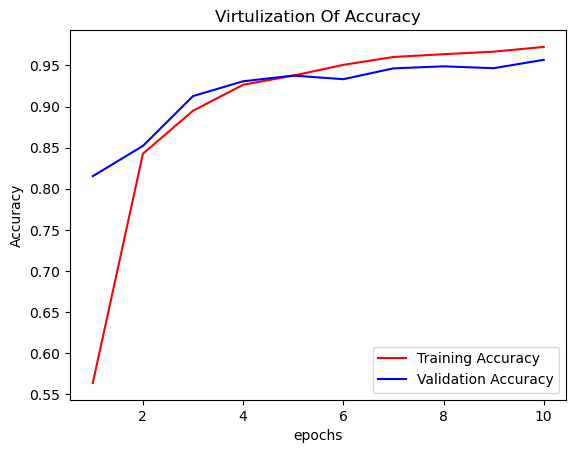

In [132]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_histroy.history['accuracy'],color='red',label = 'Training Accuracy')
plt.plot(epochs,training_histroy.history['val_accuracy'],color='blue',label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Virtulization Of Accuracy')
plt.legend()
plt.show()

## Some Metrix For Model Evaluation

In [146]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [133]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [134]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 20s 35ms/step


(array([[1.0000000e+00, 2.8130365e-13, 8.6020679e-18, ..., 7.3948998e-28,
         1.1683883e-28, 1.4398387e-25],
        [9.9999976e-01, 2.1736403e-07, 3.5967988e-15, ..., 5.0152315e-23,
         5.8952920e-23, 4.0215789e-21],
        [1.0000000e+00, 9.6807237e-17, 1.3268215e-17, ..., 7.0615766e-33,
         3.9126681e-30, 1.4392928e-28],
        ...,
        [7.4654963e-13, 2.6926633e-15, 3.0043704e-11, ..., 1.4406041e-13,
         8.1807363e-16, 9.9991119e-01],
        [8.1160821e-11, 3.1224684e-16, 1.3546511e-10, ..., 3.7567434e-09,
         1.4214311e-14, 9.9999833e-01],
        [1.9978614e-23, 6.3433043e-24, 2.2549305e-20, ..., 8.5486222e-24,
         1.7116646e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [135]:

# Find the index of the largest element in each row
largest_indices = tf.argmax(y_pred, axis=1)

print(largest_indices)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [136]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

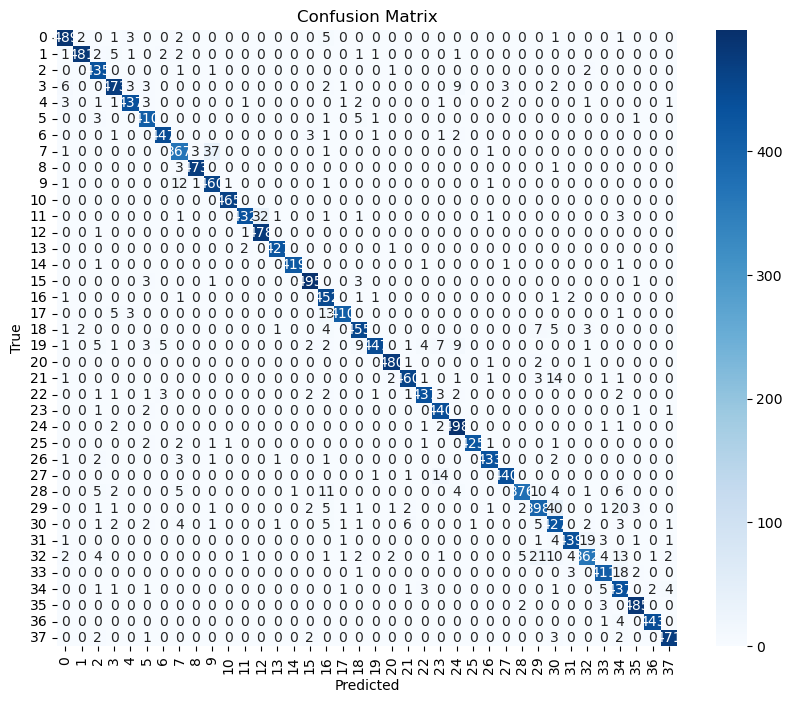

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predicted probabilities to class indices
y_pred_indices = np.argmax(y_pred, axis=1)
# Convert true categories tensor to numpy array and get class indices
true_categories_indices = np.argmax(true_categories.numpy(), axis=1)


# Compute the confusion matrix
cm = confusion_matrix(true_categories_indices, y_pred_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_categories_indices), yticklabels=np.unique(true_categories_indices))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [142]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute classification report
report = classification_report(true_categories_indices, y_pred_indices, target_names=[str(i) for i in range(38)])

# Print classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       504
           1       0.99      0.97      0.98       497
           2       0.93      0.99      0.96       440
           3       0.95      0.94      0.95       502
           4       0.98      0.96      0.97       454
           5       0.95      0.97      0.96       421
           6       0.98      0.98      0.98       456
           7       0.91      0.90      0.90       410
           8       0.99      0.99      0.99       477
           9       0.91      0.96      0.94       477
          10       1.00      1.00      1.00       465
          11       0.99      0.92      0.95       472
          12       0.94      1.00      0.97       480
          13       0.99      0.99      0.99       430
          14       1.00      0.99      0.99       423
          15       0.98      0.98      0.98       503
          16       0.89      0.98      0.93       459
   